In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#Open Weather API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
#Create a set of random latitudes and longitudes combos
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
#Create an empyt list to hold weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count=1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into the city data list
        city_data.append({"City": city.title(),
                         "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | kurtalan
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | payo
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | ilo
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | bellavista
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rocha
Processing Record 16 of Set 1 | merauke
Processing Record 17 of Set 1 | waitati
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | calvinia
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | ardistan
City not found. Skippi

Processing Record 36 of Set 4 | palmer
Processing Record 37 of Set 4 | opuwo
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | kemin
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | yinchuan
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | satitoa
City not found. Skipping...
Processing Record 45 of Set 4 | warqla
City not found. Skipping...
Processing Record 46 of Set 4 | elko
Processing Record 47 of Set 4 | kasangulu
Processing Record 48 of Set 4 | taseyevo
Processing Record 49 of Set 4 | hirara
Processing Record 50 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | riosucio
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | kumba
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | pacifica
Processing Record 8 of 

Processing Record 25 of Set 8 | dakar
Processing Record 26 of Set 8 | poya
Processing Record 27 of Set 8 | caborca
Processing Record 28 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 29 of Set 8 | abha
Processing Record 30 of Set 8 | juifang
City not found. Skipping...
Processing Record 31 of Set 8 | isla vista
Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | lagoa
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | tonantins
Processing Record 36 of Set 8 | sao luis de montes belos
Processing Record 37 of Set 8 | nuzvid
Processing Record 38 of Set 8 | lindi
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | houston
Processing Record 41 of Set 8 | havre-saint-pierre
Processing Record 42 of Set 8 | kondratovo
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | tawzar
City not found. Skipping...
Processing Record 45 of Set 8 | aasiaat
Processing Record 46 of Set 8 | kam

Processing Record 10 of Set 12 | ruston
Processing Record 11 of Set 12 | ericeira
Processing Record 12 of Set 12 | gazanjyk
Processing Record 13 of Set 12 | valdivia
Processing Record 14 of Set 12 | zaozerne
Processing Record 15 of Set 12 | gangapur
Processing Record 16 of Set 12 | celestun
Processing Record 17 of Set 12 | manavalakurichi
Processing Record 18 of Set 12 | lokosovo
Processing Record 19 of Set 12 | chipinge
Processing Record 20 of Set 12 | constantine
Processing Record 21 of Set 12 | tanout
Processing Record 22 of Set 12 | coronon
Processing Record 23 of Set 12 | kropotkin
Processing Record 24 of Set 12 | owase
Processing Record 25 of Set 12 | atyrau
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | socastee
Processing Record 28 of Set 12 | kuloy
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | san quintin
Processing Record 31 of Set 12 | kuche
City not found. Skipping...
Processing Record 32 of Set 12 | fehergyarmat
Proces

In [6]:
#Convert array of dictionaries into Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,71.19,77,1,8.16,RE,2021-10-22 00:57:31
1,Kurtalan,37.9272,41.7028,44.82,34,0,3.11,TR,2021-10-22 00:57:32
2,Albany,42.6001,-73.9662,62.31,75,6,4.16,US,2021-10-22 00:57:04
3,Payo,-3.7508,103.6372,76.98,89,100,0.36,ID,2021-10-22 00:57:32
4,Alice Springs,-23.7000,133.8833,87.35,16,0,13.80,AU,2021-10-22 00:57:33
5,Barrow,71.2906,-156.7887,28.42,93,90,4.61,US,2021-10-22 00:57:33
6,Ilo,-17.6394,-71.3375,60.82,83,39,4.29,PE,2021-10-22 00:57:33
7,Kaitangata,-46.2817,169.8464,60.10,55,0,8.90,NZ,2021-10-22 00:57:34
8,Bellavista,-7.0561,-76.5911,83.48,86,100,1.74,PE,2021-10-22 00:57:34
9,Yulara,-25.2406,130.9889,85.84,16,0,9.22,AU,2021-10-22 00:57:34


In [7]:
#Reorder columns
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-10-22 00:57:31,-21.3585,55.7679,71.19,77,1,8.16
1,Kurtalan,TR,2021-10-22 00:57:32,37.9272,41.7028,44.82,34,0,3.11
2,Albany,US,2021-10-22 00:57:04,42.6001,-73.9662,62.31,75,6,4.16
3,Payo,ID,2021-10-22 00:57:32,-3.7508,103.6372,76.98,89,100,0.36
4,Alice Springs,AU,2021-10-22 00:57:33,-23.7000,133.8833,87.35,16,0,13.80
...,...,...,...,...,...,...,...,...,...
552,Russell,US,2021-10-22 01:00:09,32.3502,-85.1999,70.97,92,13,5.06
553,Anchorage,US,2021-10-22 01:00:45,61.2181,-149.9003,44.31,82,98,8.01
554,Tallahassee,US,2021-10-22 00:59:57,30.4383,-84.2807,75.61,85,87,3.65
555,Fortuna,US,2021-10-22 01:00:47,40.5982,-124.1573,66.09,75,90,5.01


In [19]:
import os

# Create the output file (CSV).
output_data_file = "Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

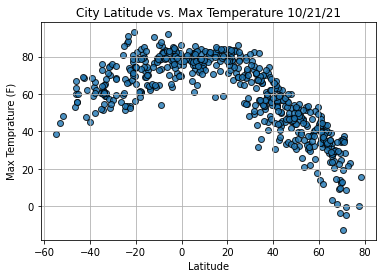

In [18]:
#Import time module
import time

#Build Scatter Plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate Other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("Analysis/Fig1.png")

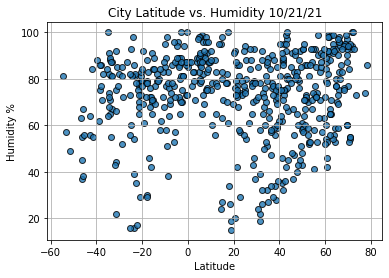

In [21]:
#Build Scatter Plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate Other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("Analysis/Fig2.png")

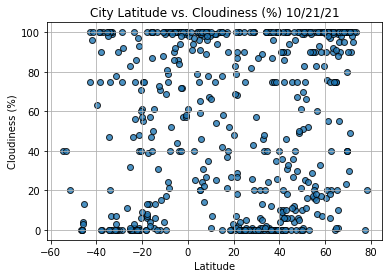

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/Fig3.png")

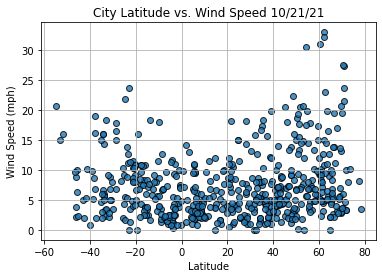

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Analysis/Fig4.png")

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                        Rocha
Country                        UY
Date          2021-10-22 00:57:36
Lat                      -34.4833
Lng                      -54.3333
Max Temp                     51.4
Humidity                       91
Cloudiness                      0
Wind Speed                   6.71
Name: 13, dtype: object

In [36]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] <= 0)]

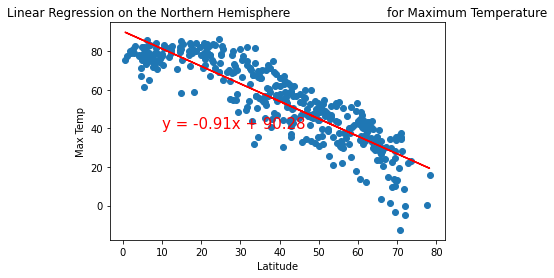

In [30]:
#Linear Regression Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

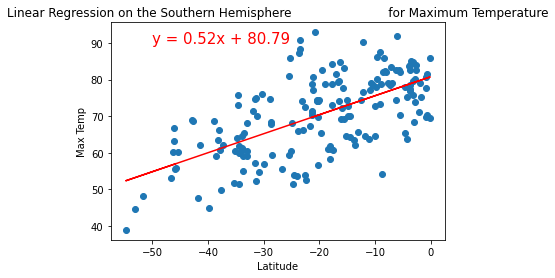

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

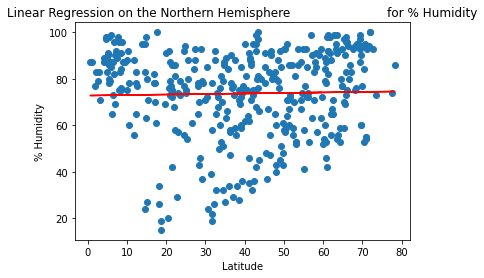

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

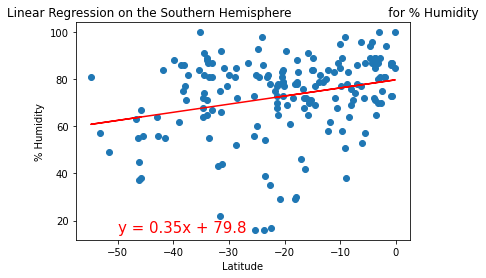

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

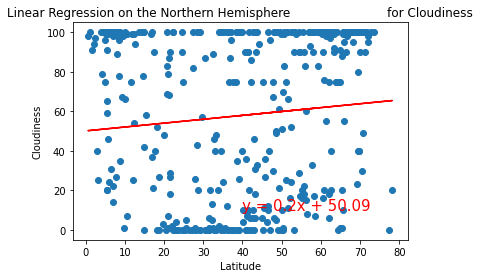

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

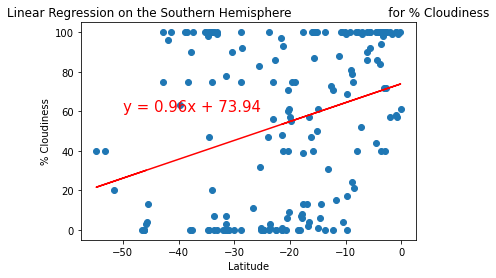

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

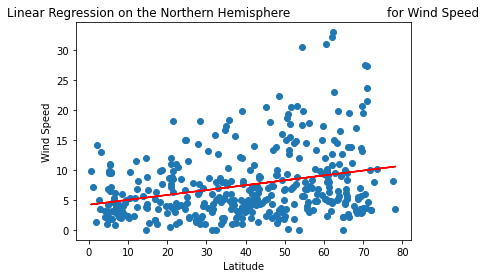

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

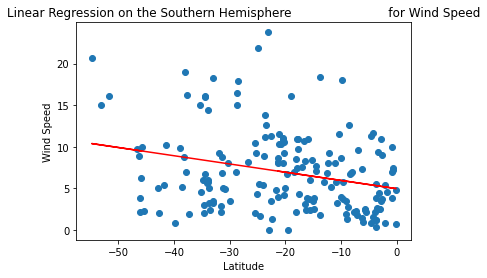

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))